In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#data = fetch_openml('mnist_784')
data = pd.read_csv("E:\\college\\python\\digit recognizer kaggle\\train.csv").to_numpy()
test = pd.read_csv("E:\\college\\python\\digit recognizer kaggle\\test.csv").to_numpy()

In [ ]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
#x, y= data['data'], data['target']

In [ ]:
#x.shape,y.shape

In [ ]:
#%matplotlib inline
#some_data = x[58000]
#some_data_image = some_data.reshape(28,28)
#plt.imshow(some_data_image, cmap= matplotlib.cm.binary, interpolation="nearest")
#plt.axis('off')

In [ ]:
#y[58000]

In [ ]:
x_train=data[:42000,1:]

In [ ]:
y_train=data[0:42000,0]
#x_test=x[60000:]
# or x_train,x_test=x[:60000],x[60000:]

In [ ]:
x_test=test[:28000,0:]
y_test=test[0:28000,0]

In [ ]:
some_data = x_test[800]
some_data_image = some_data.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

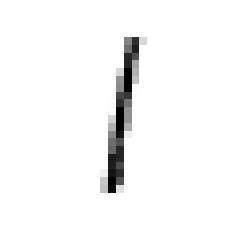

In [ ]:
plt.imshow(255-some_data_image, cmap='gray')
plt.axis('off')

In [ ]:
shuffle = np.random.permutation(42000)
x_train, y_train = x_train[shuffle],y_train[shuffle]

In [ ]:
#y_train = y_train.astype(np.int8) #converts all the values of y into integer type
#y_test = y_test.astype(np.int8)
#y_train

In [ ]:
#y_train_2 = (y_train==2) 
#y_test_2 = (y_test==2)
#creating a 2 detector, turns values into an array of true (if value == 2) and false
#y_train_2,y_test_2

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(tol = 0.1) #making a LR classifier

In [ ]:
clf.fit(x_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
submission = pd.read_csv("E://college//python//digit recognizer kaggle//sample_submission.csv")

In [ ]:
predictions=clf.predict(x_test)
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [ ]:
prediction = pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),"Label":predictions}).to_csv("E://college//python//digit recognizer kaggle//sample_submission.csv",index=False)


In [ ]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf, x_train, y_train, cv=3, scoring='accuracy')

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

In [ ]:
a

array([0.91171429, 0.90907143, 0.91442857])

In [ ]:
a.mean()

0.9117380952380952